In [1]:
import pyvista as pv

In [2]:
mesh = pv.read('test1.vtk')
stl = pv.read('clite1_cm+TCP_C-Model+UpdatedTopShield.stl')

In [3]:
import numpy as np

(0.0, 1700.0, -580.0, 580.0, 190.0, 190.0)


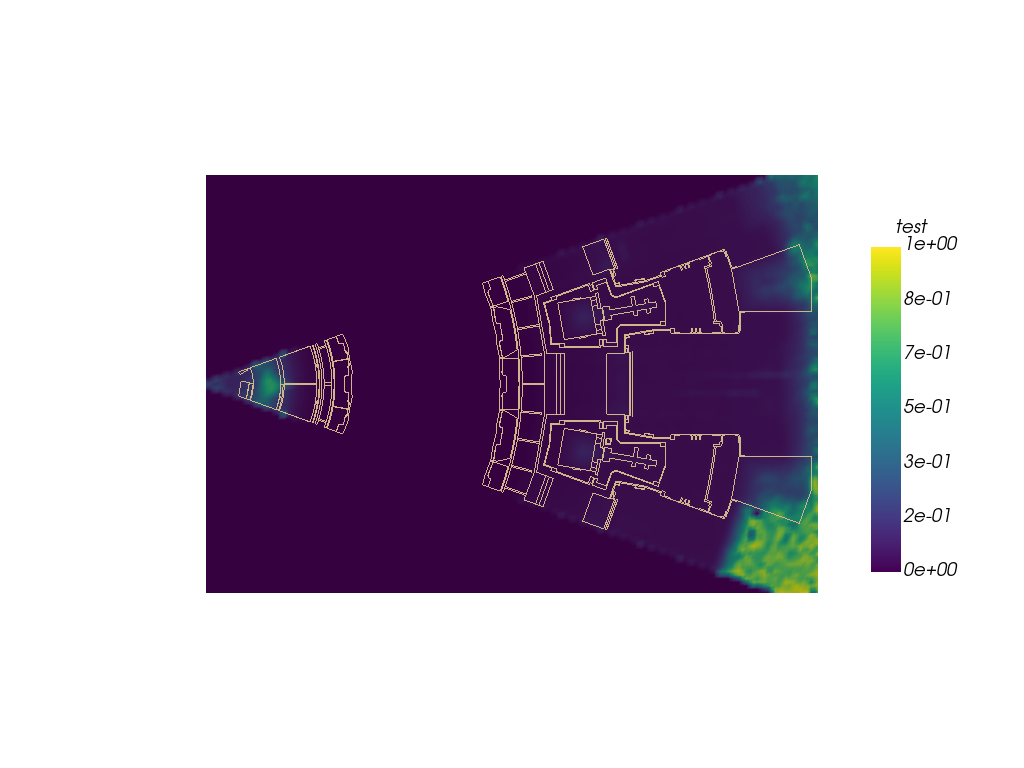

In [4]:
mesh['$\phi_n$ asd'] = mesh['Error']

pv.set_plot_theme('document')

sargs = dict(
    title_font_size=18,
    label_font_size=18,
    shadow=True,
    n_labels=7,
    italic=True,
    fmt="%.e",
    font_family="arial",
    vertical=True,
    position_x=0.85,
    position_y=0.25,
    title='test'
    )

plotter = pv.Plotter()

to_plot = mesh.slice_along_axis(5, axis='z')
idx = 2
stl_slice = stl.slice(normal='z', origin=to_plot[idx].center)

# Bounds



plotter.add_mesh(to_plot[idx], scalars = '$\phi_n$ asd', scalar_bar_args=sargs)
plotter.add_mesh(stl_slice)


# scale the bounds
bounds = np.array(to_plot[idx].bounds)
plotter.camera_position = 'xy'
plotter.reset_camera(bounds=bounds)
# correct the shift to the right


# plotter.camera.tight(adjust_render_window=False)
print(plotter.bounds)
# plotter.camera.zoom(0.7)
plotter.show(jupyter_backend='static')
# plotter.screenshot('tmp/1.jpg')
# plotter.screenshot('tmp/2.jpg', scale=2)
# mesh.plot(jupyter_backend='static')

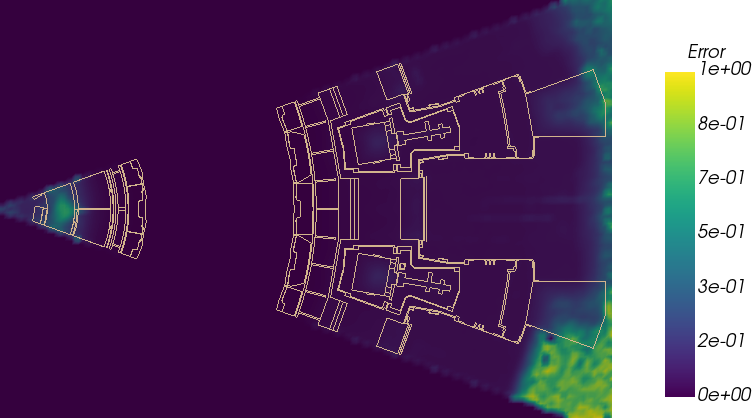

In [88]:
from PIL import Image, ImageOps

im = Image.fromarray(plotter.image)

# Get bounding box of text and trim to it
bbox = ImageOps.invert(im).getbbox()
trimmed = im.crop(bbox)

trimmed


In [28]:
dx = bounds[1] - bounds[0]
dy = bounds[3] - bounds[2]
dz = bounds[5] - bounds[4]

dim = np.array([dx, dy, dz])
dim[dim == 0] = np.nan
dim

array([1360.,  928.,   nan])

In [5]:
to_plot = mesh.slice_along_axis(5, axis='z')
slicing1 = to_plot[0]
slicing1.center

[850.0, 0.0, -1280.0]

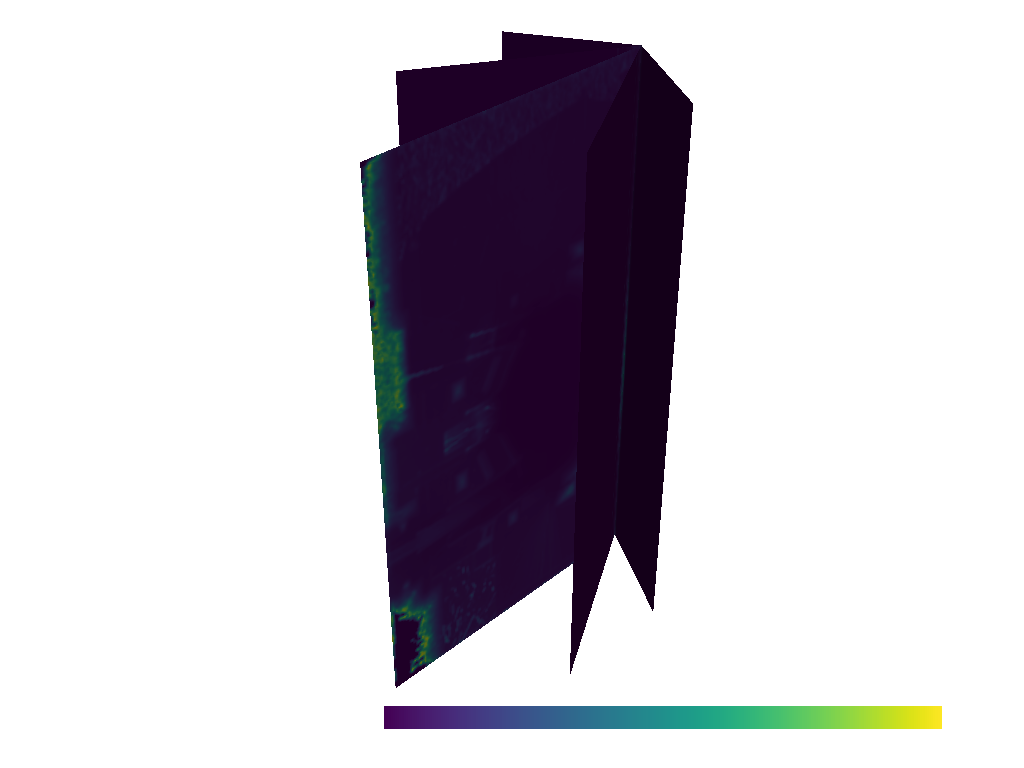

In [6]:
import numpy as np

# ranges = np.array(mesh.bounds).reshape(-1, 2).ptp(axis=1)
point = np.array([0, 0, 0])# np.array(mesh.center)


increment = np.pi / 6.0
# use a container to hold all the slices
slices = pv.MultiBlock()  # treat like a dictionary/list
for theta in np.arange(0, np.pi, increment):
    normal = np.array([np.cos(theta), np.sin(theta), 0.0]).dot(np.pi / 2.0)
    name = f'Bearing: {np.rad2deg(theta):.2f}'
    slices[name] = mesh.slice(origin=point, normal=normal)

p = pv.Plotter()
p.set_background('white')
camera_position = 'xy'
p.add_mesh(slices, scalars= 'Error')
p.show(jupyter_backend='static')


In [1]:
from f4enix.output.plotter import Atlas
import pyvista as pv

mesh = pv.read('test1.vtk')
stl = pv.read('clite1_cm+TCP_C-Model+UpdatedTopShield.stl')

atlas = Atlas(mesh, stl=stl)

slices = atlas.slice_toroidal(10, min_max_theta=(60, 120))
outpath = 'tmp'
atlas.plot_slices(slices, 'Error', outpath,
                  log_scale=False, min_max=[0, 1], n_colors=10)

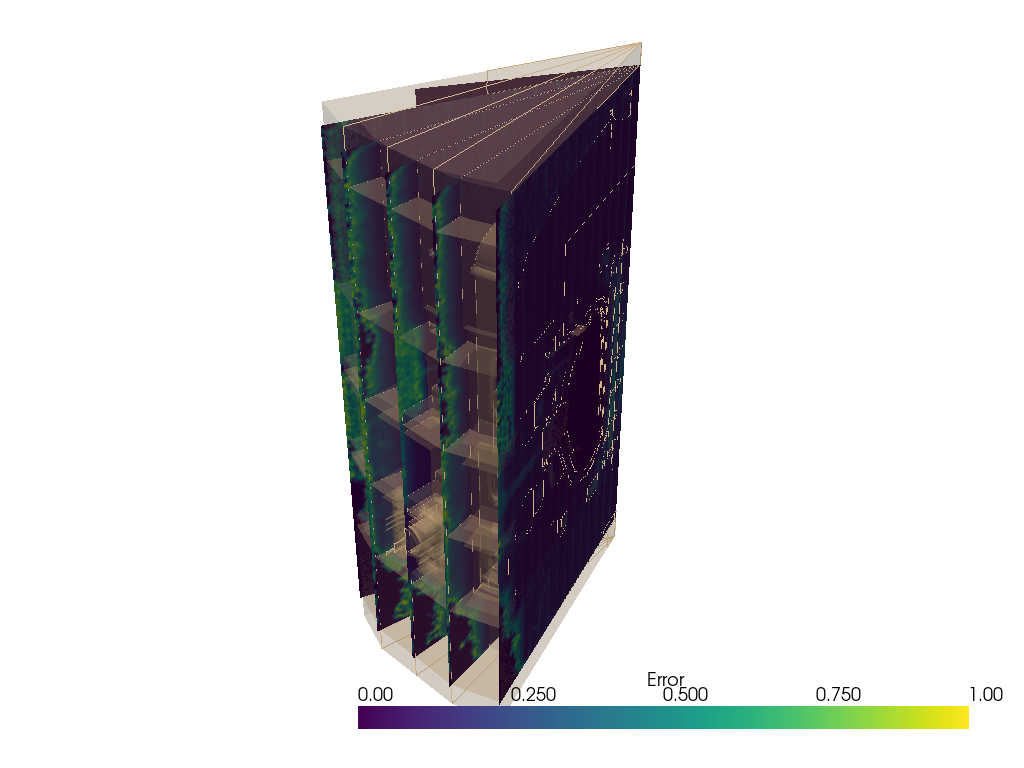

In [5]:
mesh_slices, stl_slices = atlas.slice_toroidal(10,
                                               min_max_theta=(60, 120)
                                               )


p = pv.Plotter()
# p.add_mesh(mesh_slices[1], scalars='Error')
# p.add_mesh(mesh, opacity=0.1)
# p.add_bounding_box()
for mesh_slice, stl_slice in zip(mesh_slices, stl_slices):
    p.add_mesh(mesh_slice, scalars= 'Error')
    p.add_mesh(stl_slice)

p.add_mesh(stl, opacity=0.2)

p.show(jupyter_backend='static')


In [3]:
outpath = 'tmp'
atlas.plot_slices(mesh_slices, 'Error', outpath, stl_slices=stl_slices,
                  log_scale=False, min_max=[0, 1], n_colors=10)


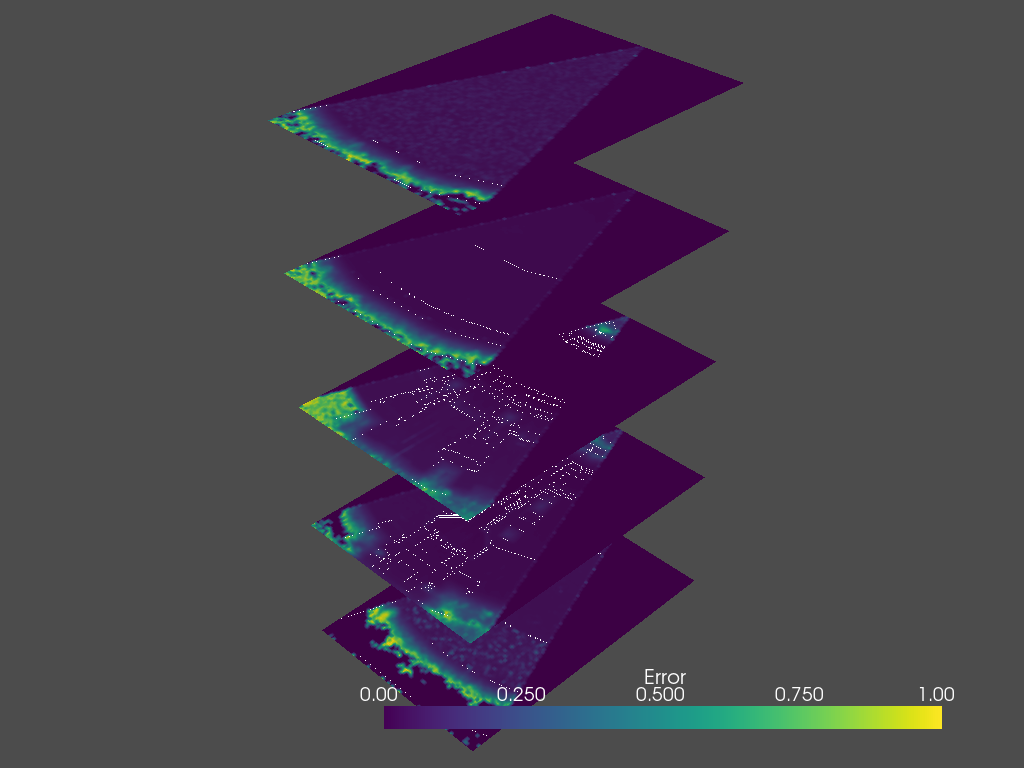

In [10]:
mesh_slices, stl_slices = atlas.slice_on_axis('z', 5)

p = pv.Plotter()
# p.add_mesh(mesh_slices[1], scalars='Error')
# p.add_mesh(mesh, opacity=0.1)
# p.add_bounding_box()
for mesh_slice, stl_slice in zip(mesh_slices, stl_slices):
    p.add_mesh(mesh_slice, scalars= 'Error')
    p.add_mesh(stl_slice)

p.show(jupyter_backend='static')

In [11]:
mesh_slice.bounds

(0.0, 1700.0, -580.0, 580.0, 1660.0, 1660.0)

In [12]:
def _set_perpendicular_camera(mesh_slice: pv.PolyData,
                                  pl: pv.Plotter) -> None:
        # align camera: focus on center, position at center + normal
        center = mesh_slice.center
        pl.camera.focal_point = center
        pl.camera.position = center + mesh_slice.cell_normals[0]
        # reset camera to put entire mesh in view

        pl.reset_camera(bounds=mesh_slice.bounds)

In [13]:
mesh_slice.point_normals


pyvista_ndarray([[ 0.,  0., -1.],
                 [ 0.,  0., -1.],
                 [ 0.,  0., -1.],
                 ...,
                 [ 0.,  0., -1.],
                 [ 0.,  0., -1.],
                 [ 0.,  0., -1.]], dtype=float32)

In [14]:
mesh_slice.cell_normals

pyvista_ndarray([[ 0.,  0., -1.],
                 [ 0.,  0., -1.],
                 [ 0.,  0., -1.],
                 ...,
                 [ 0.,  0., -1.],
                 [ 0.,  0., -1.],
                 [ 0.,  0., -1.]], dtype=float32)

In [15]:
mesh_slice.cell_normals.mean(axis=0)

pyvista_ndarray([ 0.,  0., -1.], dtype=float32)

In [16]:
mesh_slice.bounds

(0.0, 1700.0, -580.0, 580.0, 1660.0, 1660.0)

In [17]:
mesh_slice.center

[850.0, 0.0, 1660.0]

In [18]:
mesh_slice.points

pyvista_ndarray([[   0., -580., 1660.],
                 [  10., -580., 1660.],
                 [  20., -580., 1660.],
                 ...,
                 [1680.,  580., 1660.],
                 [1690.,  580., 1660.],
                 [1700.,  580., 1660.]], dtype=float32)

In [94]:
import vtk
vtk_mathtext = vtk.vtkMathTextFreeTypeTextRenderer()


In [95]:
vtk_mathtext.MathTextIsSupported()

True

In [10]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


In [2]:
import numpy as np
# Define the colors we want to use
RGB_COLORS = dict(
    blue=np.array([12 / 256, 238 / 256, 246 / 256, 1.0]),
    black=np.array([11 / 256, 11 / 256, 11 / 256, 1.0]),
    grey=np.array([189 / 256, 189 / 256, 189 / 256, 1.0]),
    yellow=np.array([255 / 256, 247 / 256, 0 / 256, 1.0]),
    green=np.array([0 / 256, 255 / 256, 0 / 256, 1.0]),
    orange=np.array([255 / 256, 165 / 256, 0 / 256, 1.0]),
    red=np.array([1.0, 0.0, 0.0, 1.0]),
    white=np.array([255 / 256, 255/ 256, 255 / 256, 1.0]),
)

['A', 'B', 'C', 'D']


c:\ProgramData\Anaconda3\envs\mcAPI\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


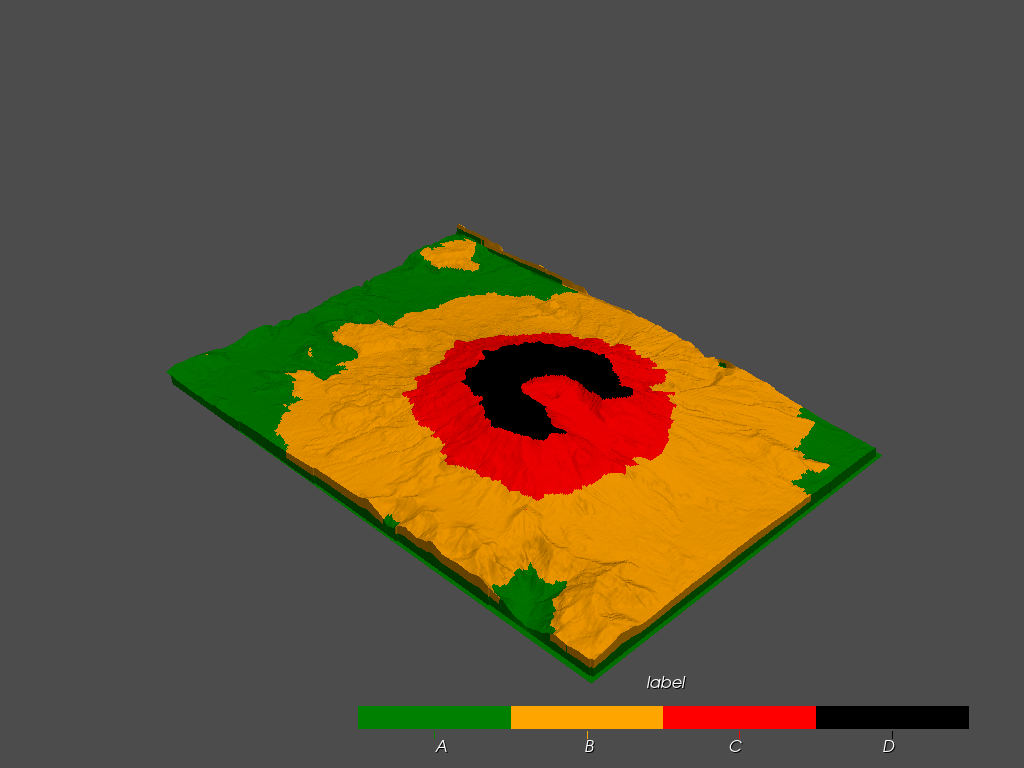

In [4]:
from pyvista import examples
import pyvista as pv
import numpy as np


mesh = examples.download_st_helens().warp_by_scalar()
# Add scalar array with range (0, 100) that correlates with elevation
mesh['values'] = mesh['Elevation']/mesh['Elevation'].max()


vals = [0.4, 0.6, 0.8, 0.9]
colors = ['green', 'orange', 'red', 'black']
n_ctg = len(colors)

categories = ['A', 'B', 'C', 'D']

def _add_categorization(mesh: pv.PolyData, array_name: str,
                        vals: list, categories, colors, name='label'):

    values = mesh[array_name]
    labels = np.empty(len(values), dtype='<U10')
    
    # categories = list(range(0, len(vals)+1))
    print(categories)
    labels[:] = categories[-1]

    vals.reverse()
    # colors.reverse()
    categories.reverse()
    for val, ctg in zip(vals, categories):
        labels[values < val] = ctg

    mesh['label'] = labels

    colors_to_use = []
    categories.reverse()
    for category, color in zip(categories, colors):
        if (labels == category).sum() > 1:
            colors_to_use.append(color)

    return colors_to_use

colors_to_use = _add_categorization(mesh, 'values', vals, categories, colors)



sargs = dict(
    title_font_size=16,
    label_font_size=16,
    shadow=True,
    italic=True,
    fmt="%.1f",
    font_family="arial",
    
)


p = pv.Plotter()
p.add_mesh(mesh, scalar_bar_args=sargs, scalars='label', categories=True,
           cmap=colors_to_use, n_colors=10, log_scale=False)
p.show()

In [93]:
# Creste string array
vals = mesh['values']# /mesh['Elevation'].max()
labels = np.empty(len(vals), dtype='<U10')
labels[:] = '< 1.32 uSv/h'
print(labels)
labels[vals < 8] = '1.32-7.5 uSv/h'
print(labels)
labels[vals < 2] = '7.5-25 uSv/h'
print(labels)

mesh['labels'] = labels
# mesh.plot(scalars='labels', cmap=['red', 'blue', 'green'])

sargs = dict(
    title_font_size=20,
    label_font_size=16,
    shadow=True,
    italic=True,
    fmt="%.1f",
    font_family="arial",
    n_labels = 0
    
)
# p = pv.Plotter()
# p.add_mesh(mesh, scalar_bar_args=sargs, cmap = ['red', 'blue', 'green'],
#            annotations=annotations)
#p.show()

['< 1.32 uSv' '< 1.32 uSv' '< 1.32 uSv' ... '< 1.32 uSv' '< 1.32 uSv'
 '< 1.32 uSv']
['1.32-7.5 u' '1.32-7.5 u' '1.32-7.5 u' ... '1.32-7.5 u' '1.32-7.5 u'
 '1.32-7.5 u']
['7.5-25 uSv' '7.5-25 uSv' '7.5-25 uSv' ... '7.5-25 uSv' '7.5-25 uSv'
 '7.5-25 uSv']


In [57]:
mesh['values'].min()

0.2681872

In [8]:
(mesh['label'] == 'B').sum()

4820

In [58]:
vals.max()

10.0

In [56]:
vals.min()

0.0

In [66]:
labels[vals < ] = 'test'

ValueError: ['green', 'yellow', 'red'] is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

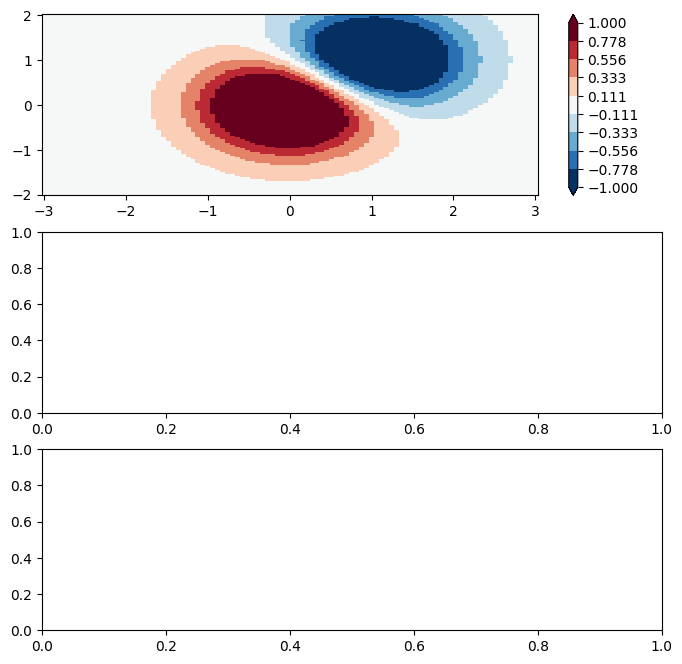

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

'''
BoundaryNorm: For this one you provide the boundaries for your colors,
and the Norm puts the first color in between the first pair, the
second color between the second pair, etc.
'''

fig, ax = plt.subplots(3, 1, figsize=(8, 8))
ax = ax.flatten()
# even bounds gives a contour-like effect
bounds = np.linspace(-1, 1, 10)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = ax[0].pcolormesh(X, Y, Z,
                       norm=norm,
                       cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[0], extend='both', orientation='vertical')

# uneven bounds changes the colormapping:
bounds = np.array([-0.25, 0.5])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = ax[1].pcolormesh(X, Y, Z, norm=norm, cmap=['green', 'yellow', 'red'])
fig.colorbar(pcm, ax=ax[1], extend='both', orientation='vertical')

pcm = ax[2].pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z))
fig.colorbar(pcm, ax=ax[2], extend='both', orientation='vertical')

plt.show()